In [1]:
import numpy as np
import matplotlib.pyplot as plt
pltparams = {"axes.grid": False,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}
plt.rcParams.update(pltparams)

import scipy.interpolate as interpolate
from scipy.stats import norm, skewnorm
from scipy.stats import kstest

import corner

Load the data

In [2]:
c2s = np.load("c2s_meta.npy", allow_pickle=True)[:, :175]
n = np.load("n_meta.npy", allow_pickle=True)[0,:175]  / 0.16

c2s = c2s.astype(float)
n = n.astype(float)

In [93]:
def cs2_contours(level=0.95, dat = c2s):
    x = n
    data =  dat.T

    plus = np.zeros(len(x))
    minus = np.zeros(len(x))
    median = np.zeros(len(x))


    for j, nval in enumerate(x):
        filt = ~np.isnan(data[j])
        plus[j], median[j], minus[j] = corner.quantile(data[j][filt], [(1-level)/2, 0.5, (1+level)/2])
        
    return x, minus, plus, median

In [95]:
x, minus_95, plus_95, median = cs2_contours();
x, minus_68, plus_68, median = cs2_contours(0.68);

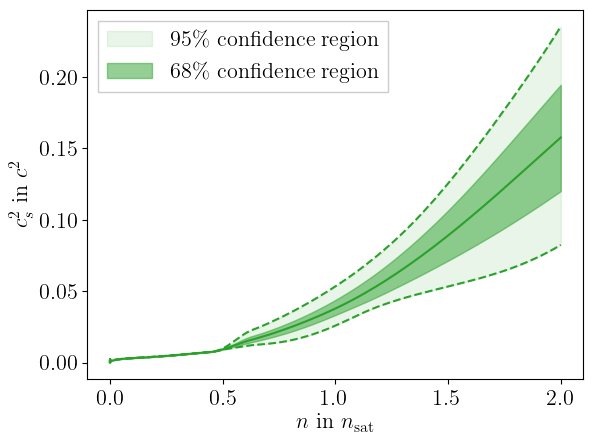

In [96]:
fig, ax = plt.subplots()

ax.plot(x, plus_95, linestyle = "dashed", color = "tab:green")
ax.plot(x, minus_95, linestyle = "dashed", color = "tab:green")
ax.plot(x, median, color="tab:green")
ax.fill_between(x, minus_95, plus_95, color = "tab:green", alpha = 0.1, label="95\% confidence region")
ax.fill_between(x, minus_68, plus_68, color="tab:green", alpha=0.5, label="68\% confidence region")


ax.legend(framealpha=1, fancybox=False)
ax.set_xlabel('$n$ in $n_{\\rm sat}$')
ax.set_ylabel("$c_s^2$ in $c^2$")
plt.show()

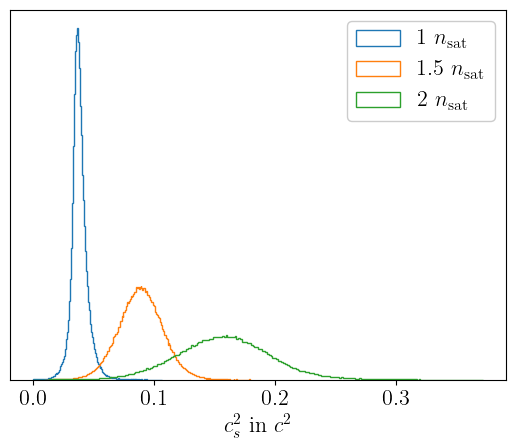

In [57]:
cs2_samples_of_n = interpolate.interp1d(n, c2s, axis=1)


fig, ax = plt.subplots(1,1)

ax.hist(cs2_samples_of_n(1), density=True, histtype="step", bins=250, label="1 $n_{\\rm sat}$")
ax.hist(cs2_samples_of_n(1.5), density=True, histtype="step", bins=250, label="1.5 $n_{\\rm sat}$")
ax.hist(cs2_samples_of_n(2), density=True, histtype="step", bins=250, label="2 $n_{\\rm sat}$")


ax.set_yticks([])
ax.set_xlabel('$c_s^2$ in $c^2$')
ax.legend(fancybox=True, framealpha=1)
plt.show()

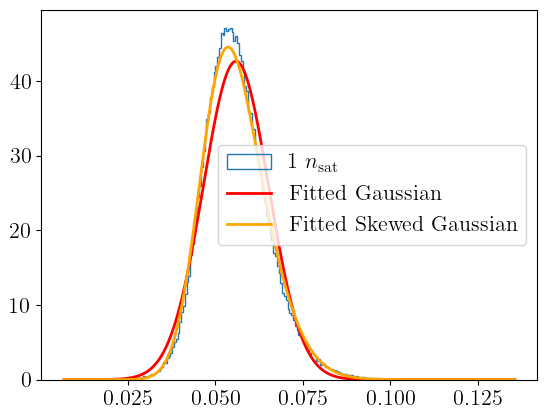

KS Test: stat=0.040, p=0.000


In [97]:
data = cs2_samples_of_n(1.2)
mu, std = norm.fit(data)
a, loc, scale = skewnorm.fit(data)

fig, ax = plt.subplots(1,1)
ax.hist(data, density=True, histtype="step", bins=250, label="1 $n_{\\rm sat}$")

x = np.linspace(min(data), max(data), 1000)
ax.plot(x, norm.pdf(x, mu, std), 'r-', lw=2, label='Fitted Gaussian')
ax.plot(x, skewnorm.pdf(x, a, loc, scale), color='orange', lw=2, label='Fitted Skewed Gaussian')


ax.legend()
plt.show()


stat, p = kstest(data, 'norm', args=(mu, std))
print('KS Test: stat=%.3f, p=%.3f' % (stat, p))

p is 0, this shit is not normal

https://doi.org/10.1016/j.cam.2019.112665 <- could say using this would make more sense and leave it as a future task

^ this is a limitation

### in phi

In [28]:
def get_phi(cs2):
    return -np.log(1/cs2 - 1)

In [29]:
phis = get_phi(c2s)


In [60]:
x, phi_minus_95, phi_plus_95, phi_median = cs2_contours(dat=phis);
x, phi_minus_68, phi_plus_68, phi_median = cs2_contours(0.68, dat=phis);

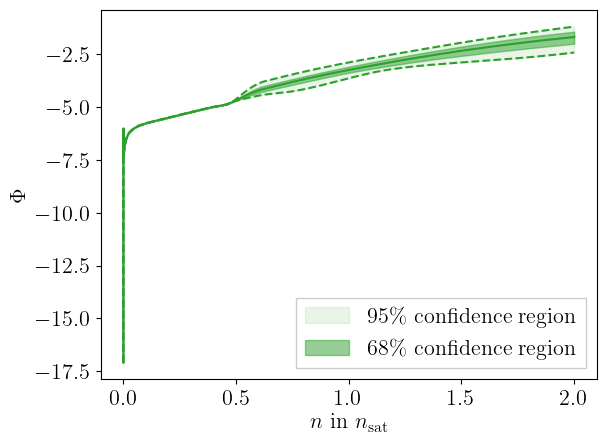

In [61]:
fig, ax = plt.subplots()

ax.plot(x, phi_plus_95, linestyle = "dashed", color = "tab:green")
ax.plot(x, phi_minus_95, linestyle = "dashed", color = "tab:green")
ax.plot(x, phi_median, color="tab:green")
ax.fill_between(x, phi_minus_95, phi_plus_95, color = "tab:green", alpha = 0.1, label="95\% confidence region")
ax.fill_between(x, phi_minus_68, phi_plus_68, color="tab:green", alpha=0.5, label="68\% confidence region")


ax.legend(framealpha=1, fancybox=False)
ax.set_xlabel('$n$ in $n_{\\rm sat}$')
ax.set_ylabel("$\Phi$")
plt.show()

In [62]:
min95 = get_phi(minus_95)
plus95 = get_phi(plus_95)
med = get_phi(median)

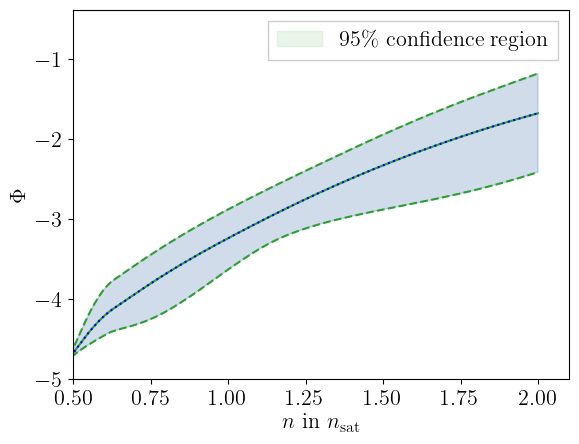

In [63]:
fig, ax = plt.subplots()

ax.plot(x, phi_plus_95, linestyle = "dashed", color = "tab:green")
ax.plot(x, phi_minus_95, linestyle = "dashed", color = "tab:green")
ax.plot(x, phi_median, color="tab:green")
ax.fill_between(x, phi_minus_95, phi_plus_95, color = "tab:green", alpha = 0.1, label="95\% confidence region")
ax.plot(x, med, color='blue', linestyle='dotted')
ax.fill_between(x, min95, plus95, color = "blue", alpha = 0.1)


ax.legend(framealpha=1, fancybox=False)
ax.set_xlabel('$n$ in $n_{\\rm sat}$')
ax.set_ylabel("$\Phi$")
ax.set_xlim(0.5,)
ax.set_ylim(-5.)
plt.show()

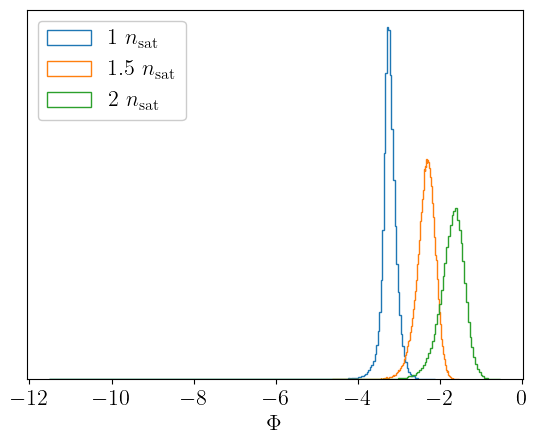

In [64]:
phis_samples_of_n = interpolate.interp1d(n, phis, axis=1)


fig, ax = plt.subplots(1,1)

ax.hist(phis_samples_of_n(1), density=True, histtype="step", bins=250, label="1 $n_{\\rm sat}$")
ax.hist(phis_samples_of_n(1.5), density=True, histtype="step", bins=250, label="1.5 $n_{\\rm sat}$")
ax.hist(phis_samples_of_n(2), density=True, histtype="step", bins=250, label="2 $n_{\\rm sat}$")


ax.set_yticks([])
ax.set_xlabel('$\Phi$')
ax.legend(fancybox=True, framealpha=1)
plt.show()

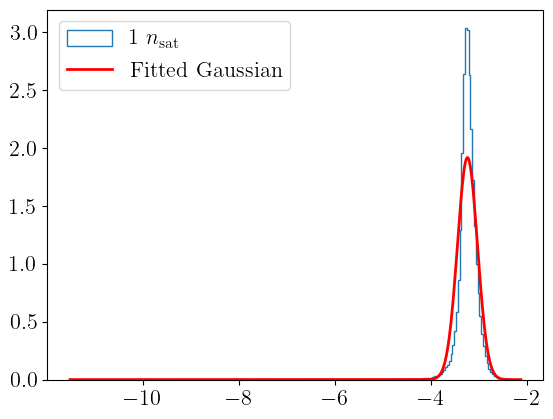

KS Test: stat=0.102, p=0.000


In [76]:
data = phis_samples_of_n(1)
mu, std = norm.fit(data)

fig, ax = plt.subplots(1,1)
ax.hist(data, density=True, histtype="step", bins=250, label="1 $n_{\\rm sat}$")

x = np.linspace(min(data), max(data), 1000)
ax.plot(x, norm.pdf(x, mu, std), 'r-', lw=2, label='Fitted Gaussian')

ax.legend()
plt.show()


stat, p = kstest(data, 'norm', args=(mu, std))
print('KS Test: stat=%.3f, p=%.3f' % (stat, p))

# Saving

In [12]:
np.savetxt("chiEFT_band_68_percent_credibility.txt", np.array([n*0.16, minus_68, plus_68]).T, header="number density [fm^-3] \t cs2 lower limit (68%) \t cs2 upper limit (68%)")

In [13]:
np.savetxt("chiEFT_band_95_percent_credibility.txt", np.array([n*0.16, minus_95, plus_95]).T, header="number density [fm^-3] \t cs2 lower limit (95%) \t cs2 upper limit (95%)")